In [2]:
import numpy as np
import networkx as nx
from utilities import random_cycle, edges_from_cycle, top_10_closeness, greatest_common_tail_size, common_tail_size
import matplotlib.pyplot as plt
from typing import Literal

plt.style.use('_mpl-gallery')

## Iterated PageRank convergence


In [3]:
def mimic_ranking(G: nx.DiGraph, edges: list, ranking: list):
    """Create a graph that mimics a given ranking: for any edge (a,b) in the list, add arrow (a,b) if b is ranked higher than a, and (b,a) otherwise"""

    ordered_edges = []
    for u, v in edges:
        if ranking.index(u) < ranking.index(v):
            ordered_edges.append((u, v))
        else:
            ordered_edges.append((v, u))
    G.add_edges_from(ordered_edges)
    return G


def apply_page_rank(G):
    # Compute PageRank
    pr = nx.pagerank(G)
    # Sort entries with decreasing score
    sorted_entries = sorted(list(pr.items()), key=lambda e: e[1])
    # Return the sorted entries numbers
    return list(map(lambda x: x[0], sorted_entries))


def create_graph(iterations, size, ranking):
    G = nx.DiGraph()
    G.add_nodes_from(range(size))

    # Start with random cycle
    edges = edges_from_cycle(random_cycle(size))
    G = mimic_ranking(G, edges, ranking)
    # Iteratively compute the page rank, and create new cycles of votes
    for i in range(iterations - 1):
        order = apply_page_rank(G)
        if i % 4 == 0:
            order = order[: size / 2 ** (-i / 4)]

        edges = edges_from_cycle(order)
        G = mimic_ranking(G, edges, ranking)

    return G

In [4]:
def apply_ranking_strategy(degree, graph_strategy: Literal['expander', "random_regular", 'recursive_pr'], data: list):
  values = [create_graph(degree, n, L, graph_strategy) for n,L  in data ]

  final_ranking = [apply_page_rank(G) for G in values]

  return [top_10(rank, computed_rank) for rank, computed_rank in zip([L for _,L in data], final_ranking)]
  # return [kendall_tau(rank, computed_rank) for rank, computed_rank in zip([L for _,L in data], final_ranking)]

In [5]:
# Number of samples
N = 40

data = [(n := np.random.randint(50,1000), list(np.random.permutation(n))) for i in range(N)]

In [7]:
DEGREE = 20
size = 100

y = create_graph(DEGREE, size,  list(np.random.permutation(size)))[1]


TypeError: slice indices must be integers or None or have an __index__ method

In [8]:
y

[4, 4, 6, 7, 7, 8, 9, 9, 9]

ValueError: x and y must be the same size

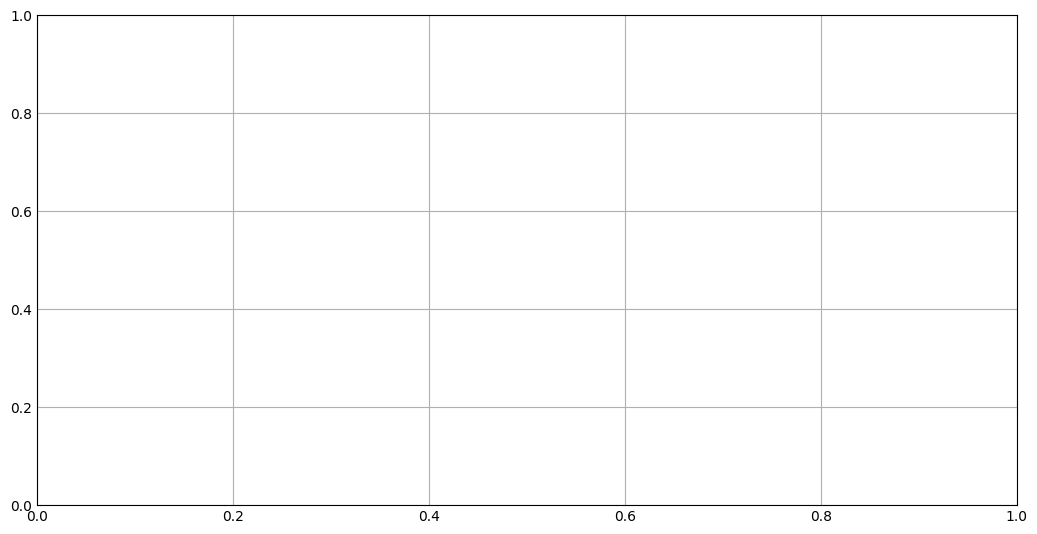

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(x, y, c="blue")
# ax.scatter(x, y4, c="green")

ax.set(xlim=(0, max(x)), xticks=np.arange(0,max(x), 400 ),
       ylim=(0, 0.3), yticks=np.arange(0, 1.2, 0.1))

plt.show()

In [18]:
min(y3)

0.014072748956469927

In [19]:
max(y3)

0.01942893945899532